In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\6':
  os.chdir(r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\6')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\Xinli\AppData\Local\Temp\ipykernel_4892\2934921794.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap_external.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\codecs.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\aliases.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\__init__.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\utf_8.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\cp1252.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\io.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\stat.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\_collections_abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\genericpath.py": 1680645435

In [2]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [3]:
#| output: false
#| warning: false
import keras_core as keras
from keras import models, layers, Input
model = models.Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=500, batch_size=30, validation_data=(X_test, y_test), verbose=0)

loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

Using TensorFlow backend


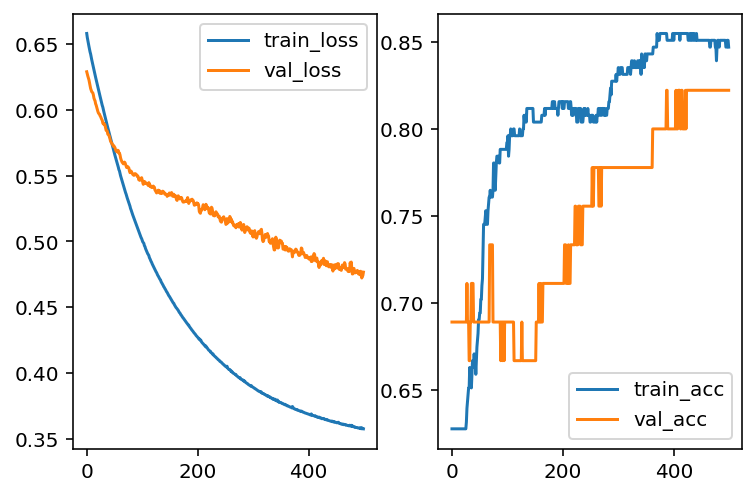

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].plot(loss_train, label='train_loss')
ax[0].plot(loss_val, label='val_loss')
ax[0].legend()

ax[1].plot(acc_train, label='train_acc')
ax[1].plot(acc_val, label='val_acc')
ax[1].legend()

In [5]:
#| output: false
#| warning: false
import keras_core as keras
from keras import regularizers
model = models.Sequential()

model.add(layers.Dense(10, activation='sigmoid', input_dim=X_train.shape[1], kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=500, batch_size=30, validation_data=(X_test, y_test), verbose=0)

loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

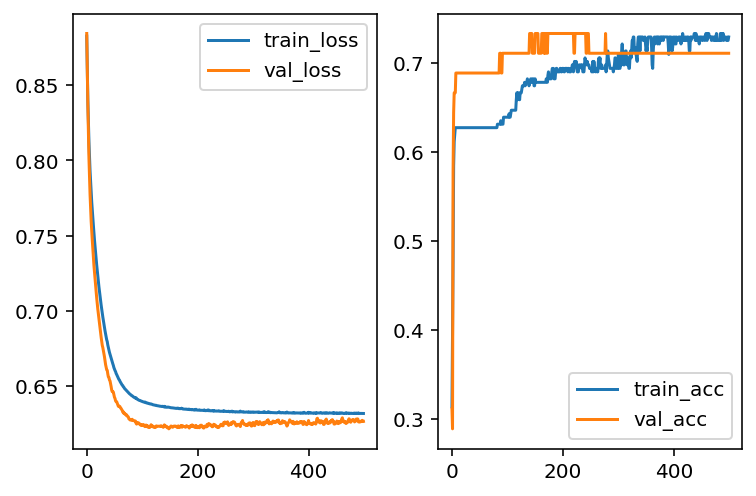

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].plot(loss_train, label='train_loss')
ax[0].plot(loss_val, label='val_loss')
ax[0].legend()

ax[1].plot(acc_train, label='train_acc')
ax[1].plot(acc_val, label='val_acc')
ax[1].legend()

In [7]:
#| output: false
import keras_core as keras
from keras import regularizers
model = models.Sequential()

model.add(layers.Dense(10, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=500, batch_size=30, validation_data=(X_test, y_test), verbose=0)

loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

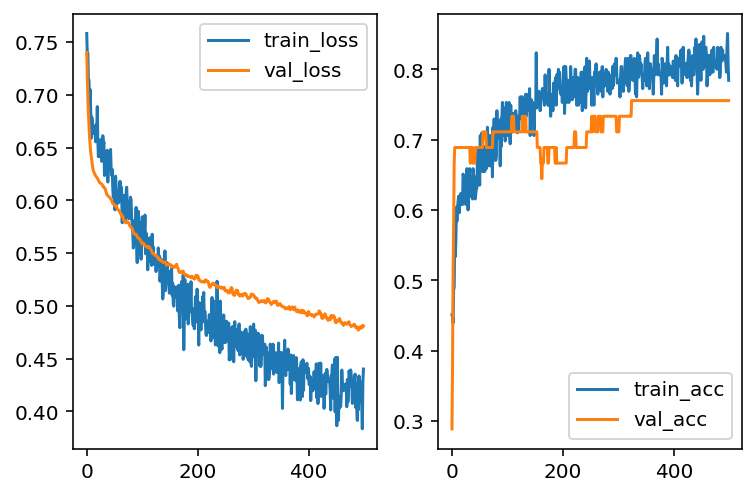

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].plot(loss_train, label='train_loss')
ax[0].plot(loss_val, label='val_loss')
ax[0].legend()

ax[1].plot(acc_train, label='train_acc')
ax[1].plot(acc_val, label='val_acc')
ax[1].legend()

In [9]:
#| output: false
import keras_core as keras
from keras import regularizers
model = models.Sequential()

model.add(layers.Dense(10, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=500, batch_size=30, validation_data=(X_test, y_test), verbose=0)

loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

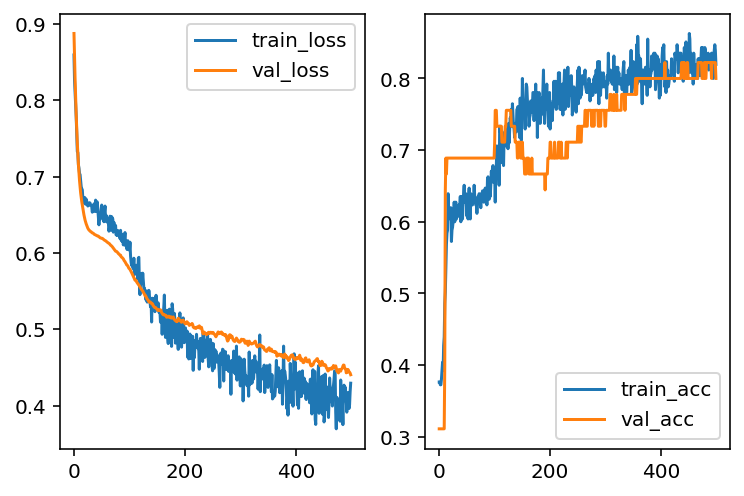

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].plot(loss_train, label='train_loss')
ax[0].plot(loss_val, label='val_loss')
ax[0].legend()

ax[1].plot(acc_train, label='train_acc')
ax[1].plot(acc_val, label='val_acc')
ax[1].legend()